请点击[此处](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576)查看本环境基本用法.  <br>
Please click [here ](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576) for more detailed instructions. 

导入所需要的包

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,make_scorer,confusion_matrix
import seaborn as sns

测试代码begin

In [2]:
X=[["男","红"],["女","绿"],["女","蓝"],["男","绿"],["女","红"]]
df=pd.DataFrame(X,columns=["性别","颜色"])
df
#创建独热编码器
onehot=OneHotEncoder()
onehot.fit(df)#训练独热编码器，得到转换规则
#转换数据
d=onehot.transform(df).toarray()
print(d)

[[0. 1. 1. 0. 0.]
 [1. 0. 0. 1. 0.]
 [1. 0. 0. 0. 1.]
 [0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 0.]]


In [3]:
X=[["男","蓝"],["女","红"],["女","红"],["男","蓝"],["女","蓝"]]
df=pd.DataFrame(X,columns=["性别","颜色"])
onehot=OneHotEncoder()
onehot.fit(df[["性别"]])#训练独热编码器，得到转换规则
#转换数据
d=onehot.transform(df[["性别"]]).toarray()
print(d)
#数组转数据框
df_sex=pd.DataFrame(d,columns=["性别x1","性别x2"])
#把df_sex拼接在df后
df=df.join(df_sex)
df

[[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


,性别,颜色,性别x1,性别x2
0,男,蓝,0.0,1.0
1,女,红,1.0,0.0
2,女,红,1.0,0.0
3,男,蓝,0.0,1.0
4,女,蓝,1.0,0.0


测试代码end

加载数据，空值处理，独热编码处理，特征和类别数据划分

In [4]:
data=pd.read_csv("议案投票.csv")
#print(data.info()) #查看数据信息,可以看出大部分列都有缺失值的情况
#把所有缺失值填充None
data=data.fillna("None")
#print(data.info()) #查看数据信息,可以看出大部分列都有缺失值的情况
x=data.iloc[:,3:]#从第4列开始获取到最后一列
#features_name=list(x.columns)  #获取特征名
#独热编码处理
#创建独热编码对象
onehot=OneHotEncoder()
#训练独热编码器，得到转换规则
onehot.fit(x)
#转换数据
oneHotData=onehot.transform(x).toarray()
#print(oneHotData) #打印转换后的数据
#划分特征和类别
x=oneHotData
y=data["Party"]   #党派只有D,R两个党派

建立伯努利贝叶斯分类模型，K折交叉验证，预测

In [5]:
#创建伯努利贝叶斯分类模型
BNBModel=BernoulliNB()
#K折交叉验证，验证模型的准确率
cvs=cross_val_score(
    BNBModel,x,y,cv=10,scoring=make_scorer(accuracy_score)
)
print("10次交叉验证的平均准确率：{}".format(cvs.mean()))

10次交叉验证的平均准确率：0.9908562367864693


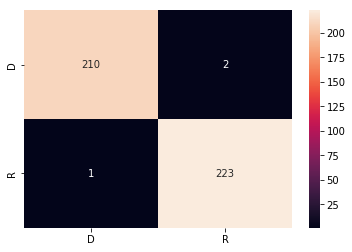

In [6]:
#对数据进行预测，通过混淆矩阵观察总体效果
#训练模型
BNBModel.fit(x,y)
data["Predict Party"]=BNBModel.predict(x)
cm=confusion_matrix(data["Party"],data["Predict Party"],labels=["D","R"])
#混淆矩阵加轴标签
cm=pd.DataFrame(cm,columns=["D","R"],index=["D","R"])
#通过热力图显示混淆矩阵
sns.heatmap(cm,annot=True,fmt="d")